_The orbital motion of two bodies is governed by Newton’s law of gravitation for point masses. However, the dependence of the gravitational force on distance gives rise to tidal forces between different parts of an extended body, such as a planet, in the gravitational field of another body._

# __The magnitude of the tidal force increases with the distance from Earth’s center. It has a maximum both in the direction toward the Moon (θ = 0) and in the opposite direction (θ = π). It is sometimes conceived as counter-intuitive that tidal forces are strongest and directed outwards and, thus, producing high tides both at the nearest and the farthest side. However, this follows from the fact that tidal forces are differential forces.

__1} Here we are calculating tidal force between EARTH And MOON.__

In [2]:
import numpy as np
from scipy.constants import g,G
from astropy.constants import R_earth,M_earth

M = 0.07346e24 # mass of the moon in kg
r = 3.844e8 # semi-major axis of moon orbit in m

coeff = G*M/r**3
accel_scale = 2*coeff*R_earth.value
print("tidal acceleration = {:.2e} m/s^2 = {:.2e} g".\
format(accel_scale,accel_scale/g))

# Size of the tidal Bulge {h}
h = 15*M*R_earth.value**4/(8*M_earth.value*r**3)
print("size of tidal bulge = {:.2f} m".format(h))

# array of evenly spaced grid points along x- and y-axis
X = np.linspace(-1.1, 1.1, num=23, endpoint=True)
Y = np.linspace(-1.1, 1.1, num=23, endpoint=True)
print(X)

# create two-dimensional mesh grid scaled by Earth radius
R_x, R_y = np.meshgrid(R_earth.value*X, R_earth.value*Y)
print(R_x.shape)
print(R_x[11,21],R_y[11,21])
# radial distances of mesh points from (0,0)
R = np.sqrt(R_x*R_x + R_y*R_y)

# components of tidal acceleration field within Earth radius
accel_x = np.ma.masked_where(R > R_earth.value, 2*coeff*R_x)
accel_y = np.ma.masked_where(R > R_earth.value, -coeff*R_y)

tidal acceleration = 1.10e-06 m/s^2 = 1.12e-07 g
size of tidal bulge = 0.67 m
[-1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2
  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]
(23, 23)
6378100.0 0.0


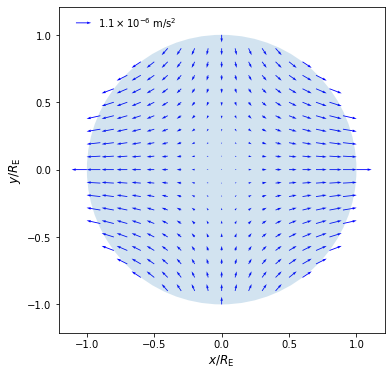

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')

# plot vector field
arrows = ax.quiver(X, Y, accel_x, accel_y, color='blue')
ax.quiverkey(arrows, X=0.1, Y=0.95, U=accel_scale,
label=r'$1.1\times 10^{-6}\;\mathrm{m/s}^2$',labelpos='E')

# add a circle
circle = Circle((0, 0), 1, alpha=0.2, edgecolor=None)
ax.add_patch(circle)

ax.set_xlabel(r'$x/R_{\mathrm{E}}$', fontsize=12)
ax.set_ylabel(r'$y/R_{\mathrm{E}}$', fontsize=12)

plt.show()
plt.savefig("tidal_accel_earth.pdf")